<h2>Repayment of Loan:</h2>
<p>This file contains the code for finding the Multivariate Outliers and various techniques which are used to compute those multivariate outliers. Further, data modelling is also present where we train the data on various Machine Learning Algorithms and predict whether a customer who has taken loan from the Bannk can repay it or not on time. We have also use used SMOTE (Synthetic Minority Oversampling Technique) in order to deal with the unbalanced data.</p>

In [1]:
# Importing numpy, pandas, matplotlib and seaborn :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for handling the warnings:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# importing data:
orig_data = pd.read_csv('Final Data for Modelling.csv')
orig_data.head()

,Unnamed: 0,log.installment,fico,purpose_credit_card,revol.util,log.days.with.cr.line,poss.getting.loan,loan.info,purpose_educational,log.annual.inc,...,dti,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value,target
0,0,0.964137,0.581395,0,0.437815,0.657017,0.000000,0.344562,0,0.613398,...,0.650200,0.214168,1,0,0.000000,0.092885,0,0,0.311832,1
1,1,0.596533,0.441860,1,0.644538,0.442095,0.000000,0.121045,0,0.540672,...,0.476969,0.155318,1,0,0.000000,0.141540,0,0,0.146674,1
2,2,0.731655,0.325581,0,0.215126,0.602824,0.007038,0.412307,0,0.348557,...,0.388184,0.070230,1,0,0.030303,0.030022,0,0,0.258501,1
3,3,0.499738,0.465116,0,0.615126,0.435482,0.009768,0.064113,0,0.613398,...,0.270360,0.206675,1,0,0.030303,0.108378,0,0,0.143231,1
4,4,0.370560,0.255814,1,0.331933,0.558606,0.000000,0.043559,0,0.599660,...,0.499666,0.088294,1,0,0.000000,0.016052,0,0,0.104954,1


In [3]:
# creating the independent and dependent features:
orig_data_copy = orig_data.copy() # creating a copy of the data
y_target = orig_data_copy['target']
x_encoded = orig_data_copy.drop(['target', 'Unnamed: 0'], axis=1)

In [4]:
x_encoded.head()

,log.installment,fico,purpose_credit_card,revol.util,log.days.with.cr.line,poss.getting.loan,loan.info,purpose_educational,log.annual.inc,credit.policy,log.int.rate,dti,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value
0,0.964137,0.581395,0,0.437815,0.657017,0.000000,0.344562,0,0.613398,1,0.419943,0.650200,0.214168,1,0,0.000000,0.092885,0,0,0.311832
1,0.596533,0.441860,1,0.644538,0.442095,0.000000,0.121045,0,0.540672,1,0.337611,0.476969,0.155318,1,0,0.000000,0.141540,0,0,0.146674
2,0.731655,0.325581,0,0.215126,0.602824,0.007038,0.412307,0,0.348557,1,0.535675,0.388184,0.070230,1,0,0.030303,0.030022,0,0,0.258501
3,0.499738,0.465116,0,0.615126,0.435482,0.009768,0.064113,0,0.613398,1,0.293294,0.270360,0.206675,1,0,0.030303,0.108378,0,0,0.143231
4,0.370560,0.255814,1,0.331933,0.558606,0.000000,0.043559,0,0.599660,1,0.582712,0.499666,0.088294,1,0,0.000000,0.016052,0,0,0.104954


<h3>Checking for Correlated Features among the best chosen Features:</h3>

In [5]:
# highly correlated independent features with thresholded correlation>0.6:
correlation_table = x_encoded.corr()
highly_correlated_feats = []
all_feats = list(correlation_table.columns)
for idx_row in range(len(correlation_table)):
    for idx_column in range(len(correlation_table)):
        if (idx_row != idx_column):
            corr_value = correlation_table.iloc[idx_row, idx_column] 
            if (corr_value > 0.6):
                info_to_add = (all_feats[idx_row], all_feats[idx_column], corr_value)
                highly_correlated_feats.append(info_to_add)
            else:
                continue
        else:
            continue

# Creating a table for features whose correlation is relly high:
corr_feats_table = pd.DataFrame(highly_correlated_feats, columns=['Feature-1', 'Feature-2', 'Correlation'])
corr_feats_table

,Feature-1,Feature-2,Correlation
0,log.days.with.cr.line,credit.value,0.841143
1,log.annual.inc,fico.to.delinq.2yrs,0.836255
2,fico.to.delinq.2yrs,log.annual.inc,0.836255
3,credit.value,log.days.with.cr.line,0.841143


In [6]:
# to drop feats:
current_feats = list(x_encoded.columns)
to_drop_feats = ['log.annual.inc', 'log.days.with.cr.line']
for feat in to_drop_feats:
    current_feats.remove(feat)
current_feats

['log.installment',
 'fico',
 'purpose_credit_card',
 'revol.util',
 'poss.getting.loan',
 'loan.info',
 'purpose_educational',
 'credit.policy',
 'log.int.rate',
 'dti',
 'fico.to.delinq.2yrs',
 'pub.rec_0',
 'purpose_major_purchase',
 'inq.last.6mths',
 'revol.bal.to.annual.income',
 'purpose_small_business',
 'pub.rec_1',
 'credit.value']

In [7]:
# updating the important features:
x_encoded = x_encoded[current_feats]
x_encoded

,log.installment,fico,purpose_credit_card,revol.util,poss.getting.loan,loan.info,purpose_educational,credit.policy,log.int.rate,dti,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value
0,0.964137,0.581395,0,0.437815,0.000000,0.344562,0,1,0.419943,0.650200,0.214168,1,0,0.000000,0.092885,0,0,0.311832
1,0.596533,0.441860,1,0.644538,0.000000,0.121045,0,1,0.337611,0.476969,0.155318,1,0,0.000000,0.141540,0,0,0.146674
2,0.731655,0.325581,0,0.215126,0.007038,0.412307,0,1,0.535675,0.388184,0.070230,1,0,0.030303,0.030022,0,0,0.258501
3,0.499738,0.465116,0,0.615126,0.009768,0.064113,0,1,0.293294,0.270360,0.206675,1,0,0.030303,0.108378,0,0,0.143231
4,0.370560,0.255814,1,0.331933,0.000000,0.043559,0,1,0.582712,0.499666,0.088294,1,0,0.000000,0.016052,0,0,0.104954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.713957,0.279070,0,0.689916,0.015608,0.061466,0,0,0.606463,0.346796,0.455333,1,0,0.060606,0.302212,0,0,0.589051
9574,0.631094,0.511628,0,0.009244,0.367309,0.131067,0,0,0.464235,0.007009,0.168939,1,0,0.151515,0.000730,0,0,0.239577
9575,0.356156,0.348837,0,0.696639,0.050469,0.083828,0,0,0.337611,0.436916,0.090174,1,0,0.242424,0.068653,0,0,0.186246
9576,0.719536,0.372093,0,0.026891,0.022024,0.257127,0,0,0.700079,0.640187,0.115279,1,0,0.151515,0.000000,0,0,0.091621


<h2>Multivariate Outliers:</h2>

In [8]:
# for visualizing outliers in 2D graph:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
red_x_encoded = pca.fit_transform(x_encoded)

# Variance explained by each principal component:
pca.explained_variance_ratio_

array([0.2194255 , 0.15000172, 0.13380983, 0.11069751, 0.08315571])

<h3>1) Mahalanobis Distance:</h3>

In [9]:
# function which computes the mahalanobis distance for each data point:
def mahalanobis_distance(data):
    
    # computing the mean of each feature and aligning the features in the right way:
    x = np.transpose(data.values) # to get all the feature's value in each vector.
    means = np.mean(x, axis=1).reshape(len(data.columns), 1) # compute mean of each of the feature and reshape it
    
    # computing the terms required:
    x_minus_mu = x-means
    inv_cov_mat = np.linalg.inv(np.cov(x))
    left_side = np.dot(np.transpose(x_minus_mu), inv_cov_mat)
    maha_dist_matrix = np.dot(left_side, x_minus_mu)
    return maha_dist_matrix.diagonal()

In [10]:
# mahalanobis distance for each data point:
maha_distance = mahalanobis_distance(x_encoded)
maha_distance

array([ 5.31880917, 10.46783059,  8.19603234, ..., 17.78211512,
       15.13765279, 13.55987945])

Text(0.5, 1.0, 'Distribution of Log of Mahalanobis Distance')

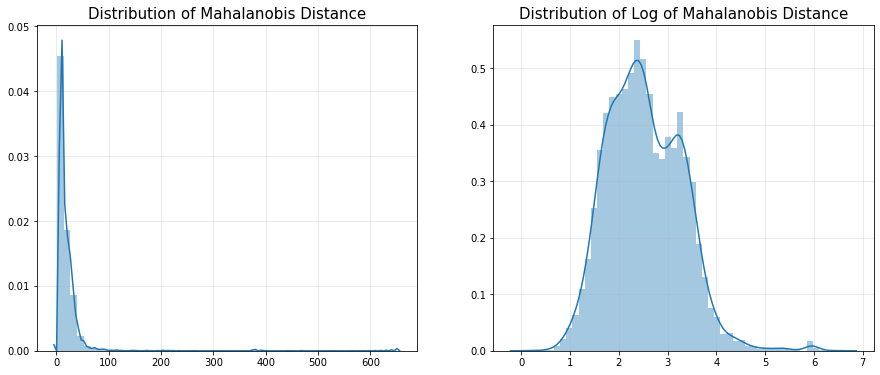

In [11]:
# distribution of maha_distance:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot:
sns.distplot(maha_distance, ax=ax1)
ax1.grid(True, alpha=0.3)
ax1.set_title('Distribution of Mahalanobis Distance', fontsize=15)

# First plot:
sns.distplot(np.log(maha_distance), ax=ax2)
ax2.grid(True, alpha=0.3)
ax2.set_title('Distribution of Log of Mahalanobis Distance', fontsize=15)

<h3>Observations from Mahalanobis Distance:</h3>
<p>
<ol>
    <li>Most of the data points have mahalanobis distance less than 50. These points are the inliers.</li>
    <li>The distribution seems to be that of Chi-Square Distribution.</li>
    <li>Log of Mahalanobis Distance is plotted to have a look at whether it is Gaussian Distribution or not and then we can raise the outliers based upon the mechanism of Gaussian Distribution.</li>
    <li><strong>Since, Chi-sqaure test is only used when the population is normally distributed, thus we won't be using this technique. Further, we would be moving ahead with the <code>log-of-mahalanobis-distance</code></strong></li>
 </ol>
</p>

In [12]:
# log of maha distance is approximately normally distributed, thus outliers can easily be rasied:
log_maha_distance = np.log(maha_distance)

In [13]:
# graphical interpretation of log-maha-distance:
def graphical_inter_num_feature(data, num_feature, upper_thresh, lower_thresh, max_height):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # probability distribution of numerical feature:
    sns.distplot(data[num_feature], ax=ax1, color='darkred')
    ax1.vlines(upper_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.vlines(lower_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.fill_betweenx(y= np.linspace(0, max_height, len(data[num_feature])), x1=lower_thresh, x2=upper_thresh, color='yellow', alpha=0.3)
    ax1.set_title('PDF of '+num_feature)
    ax1.grid(True, alpha=0.4)
    
    # boxplots to investigate outliers:
    sns.boxplot(y=num_feature, data=data, ax=ax2)
    ax2.set_title('Boxplot of '+num_feature)
    ax2.grid(True, alpha=0.4)
    
# outliers based upon mahalanobis distance:
def outliers_zscore(data, num_feature, max_height=0.7):
    mean = np.mean(data[num_feature])
    std_dev = np.std(data[num_feature])
    data['z_score'+num_feature] = (data[num_feature]-mean)/std_dev
    print('Mean --> ', mean)
    print('Median --> ', np.percentile(data[num_feature], 50))
    print('Standard Deviation --> ', std_dev)
    
    # computing those indexes whose z_score > 3:
    right_outliers_data = data[data['z_score'+num_feature] > 3]
    left_outliers_data = data[data['z_score'+num_feature] < -3]
    
    # assigning the mahalanobis outliers:
    data['maha_outliers'] = np.where(data['z_score'+num_feature] > 3, -1, 1)
    data['maha_outliers'] = np.where(data['z_score'+num_feature] < -3, -1, data['maha_outliers'])
    
    # combining the outliers:
    final_outliers_data = pd.concat([right_outliers_data, left_outliers_data])
    print('Proportion of Outlier Data: ', (len(final_outliers_data)/len(data))*100, '%')
    index_pos = list(final_outliers_data.index)
    
    # threshold value i.e. value at 3rd standard deviation:
    left_stddev_3 = -3*std_dev + mean
    right_stddev_3 = 3*std_dev + mean
    graphical_inter_num_feature(data, num_feature, right_stddev_3, left_stddev_3, max_height)
    return index_pos

In [14]:
# creating the feature of log_maha_distance:
# orig_data_copy = orig_data_copy.drop(['Unnamed: 0'], axis=1)
orig_data_copy['log_maha_distance'] = log_maha_distance
orig_data_copy.head()

,Unnamed: 0,log.installment,fico,purpose_credit_card,revol.util,log.days.with.cr.line,poss.getting.loan,loan.info,purpose_educational,log.annual.inc,...,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value,target,log_maha_distance
0,0,0.964137,0.581395,0,0.437815,0.657017,0.000000,0.344562,0,0.613398,...,0.214168,1,0,0.000000,0.092885,0,0,0.311832,1,1.671249
1,1,0.596533,0.441860,1,0.644538,0.442095,0.000000,0.121045,0,0.540672,...,0.155318,1,0,0.000000,0.141540,0,0,0.146674,1,2.348307
2,2,0.731655,0.325581,0,0.215126,0.602824,0.007038,0.412307,0,0.348557,...,0.070230,1,0,0.030303,0.030022,0,0,0.258501,1,2.103650
3,3,0.499738,0.465116,0,0.615126,0.435482,0.009768,0.064113,0,0.613398,...,0.206675,1,0,0.030303,0.108378,0,0,0.143231,1,1.887298
4,4,0.370560,0.255814,1,0.331933,0.558606,0.000000,0.043559,0,0.599660,...,0.088294,1,0,0.000000,0.016052,0,0,0.104954,1,2.632186


Mean -->  2.5362537756252443
Median -->  2.4662855877320125
Standard Deviation -->  0.7643783283088079
Proportion of Outlier Data:  0.6473167675923992 %
Number of Outliers based upon Mahalanobis Distance --> 62


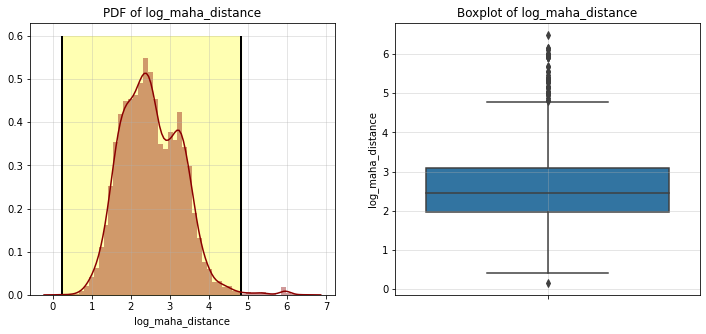

In [15]:
# finding the outliers based upon z-score:
index_outliers_maha = outliers_zscore(orig_data_copy, 'log_maha_distance', 0.6)
print('Number of Outliers based upon Mahalanobis Distance -->', len(index_outliers_maha))

Text(0.5, 1.0, 'Mahalanobis Outliers')

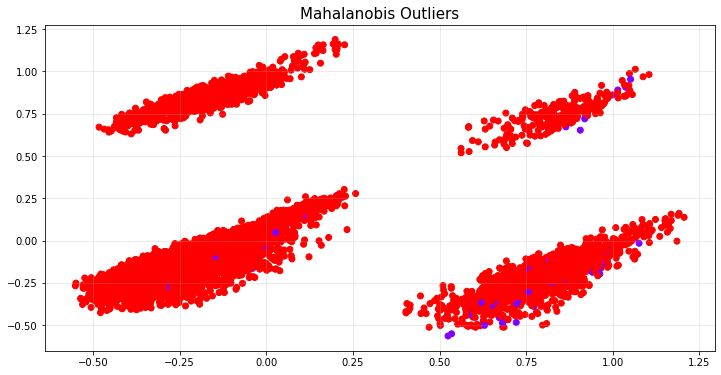

In [16]:
# plotting the mahalanobis outliers:
plt.figure(figsize=(12, 6))
plt.scatter(red_x_encoded[:, 0], red_x_encoded[:, 1], c=orig_data_copy['maha_outliers'], cmap='rainbow')
plt.grid(True, alpha=0.3)
plt.title('Mahalanobis Outliers', fontsize=15)

<h3>Observation:</h3>
<p>
<ol>
    <li>Since mean and median remains almost the same, hence we can say the data is normally distributed.</li>
    <li>There are 62 number of data points which have been raised as Multivariate Outliers.</li>
    <li>The data point's index positions are stored in <code>index_outliers_maha</code> which have been flagged as outliers.</li>
  </ol>
</p>

<h3>2) Isolation Forest:</h3>
<p>Over here, several trees are grown where in each tree, a feature is randomly chosen alon with a randome split-value. Then, after the creation of trees, one by one the data points are passed through each of the trees and outliers tend to have shorter path length from the root node. Hence, in this way, a data point is flagged as an outlier.</p>

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
# flagging an outlier based upon the Isolation Forest Algorithm
iso_forest = IsolationForest(random_state=42, n_estimators=1000, contamination=0.05).fit(x_encoded)
iso_forest_pred = iso_forest.predict(x_encoded)
orig_data_copy['iso_forest_outlier'] = iso_forest_pred

In [19]:
index_outliers_iso_forest = orig_data_copy[orig_data_copy['iso_forest_outlier']==-1].index
print('Number of Outliers flagged by Isolation forest -->', len(index_outliers_iso_forest))
print('Proportion of Outliers flagged by Isolation forest -->', (len(index_outliers_iso_forest)/len(x_encoded))*100, '%')

Number of Outliers flagged by Isolation forest --> 479
Proportion of Outliers flagged by Isolation forest --> 5.0010440593025685 %


<li><strong>A lot of data points are being flagged as outliers by Isolation Forest. Thus, we can keep these outliers data in a separate dataframe and remove them from the original training data i.e. <code>x_encoded</code>. Further, while training the model, we would try to model on both the data and see if the addition of these outliers data point results in deprication of the performance of model.</strong></li> 

Text(0.5, 1.0, 'Isolation Forest Outliers')

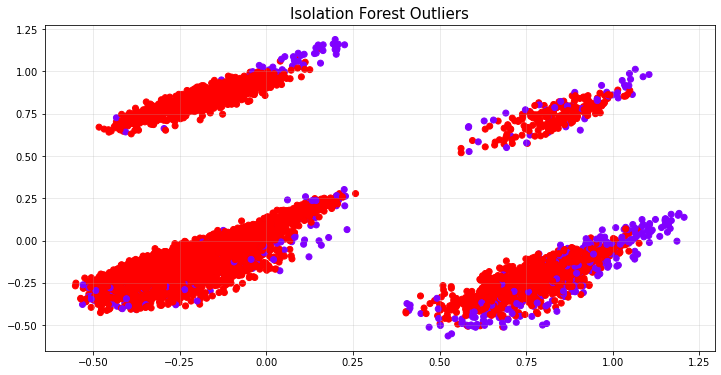

In [20]:
# plotting the isolation forest outliers:
plt.figure(figsize=(12, 6))
plt.scatter(red_x_encoded[:, 0], red_x_encoded[:, 1], c=orig_data_copy['iso_forest_outlier'], cmap='rainbow')
plt.grid(True, alpha=0.3)
plt.title('Isolation Forest Outliers', fontsize=15)

<h3>3) Local Outlier Factor:</h3>
<p>It computes Relative Density of a data point with respect to its k-neighbors. If the relative density is large, then the data point is situated well inside a concentrated region where as if relative density is less, then it means the data point is situated in a region far away from the concentrated region of data points.</p>

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
loc_outlier_fact_pred = LocalOutlierFactor().fit_predict(x_encoded)
orig_data_copy['loc_outlier_fact'] = loc_outlier_fact_pred

In [23]:
index_outliers_loc_outlier_fact = orig_data_copy[orig_data_copy['loc_outlier_fact']==-1].index
index_outliers_loc_outlier_fact

Int64Index([  99,  113,  187,  232,  312,  347,  453,  462,  533,  832,
            ...
            9348, 9362, 9369, 9386, 9404, 9458, 9462, 9492, 9493, 9529],
           dtype='int64', length=176)

Text(0.5, 1.0, 'Local Outlier Factor Outliers')

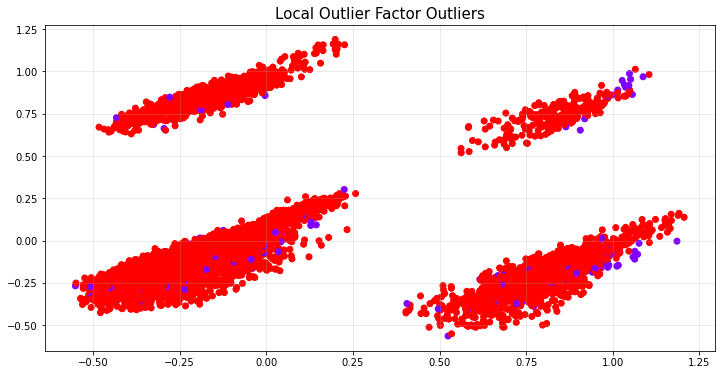

In [24]:
# plotting the local outlier factor outliers:
plt.figure(figsize=(12, 6))
plt.scatter(red_x_encoded[:, 0], red_x_encoded[:, 1], c=orig_data_copy['loc_outlier_fact'], cmap='rainbow')
plt.grid(True, alpha=0.3)
plt.title('Local Outlier Factor Outliers', fontsize=15)

<h3>Union of Outliers defined by the above 3 techniqes:</h3>

In [25]:
index_outliers_all = list(set(index_outliers_iso_forest).union(set(index_outliers_maha).union(set(index_outliers_loc_outlier_fact))))
print('Total Number of Outliers -->', len(index_outliers_all))

Total Number of Outliers --> 561


<h3>Outliers Data:</h3>

In [26]:
# separating the outliers data and storing them in a separate variable:
outliers_indep_feats = x_encoded.iloc[index_outliers_all, :]
outliers_target_feat = y_target.iloc[index_outliers_all]

In [27]:
# removing the data points raised as outliers:
x_encoded = x_encoded.drop(index=index_outliers_all)
y_target = y_target.drop(index=index_outliers_all)

Text(0.5, 1.0, 'Distribution of Target Feature')

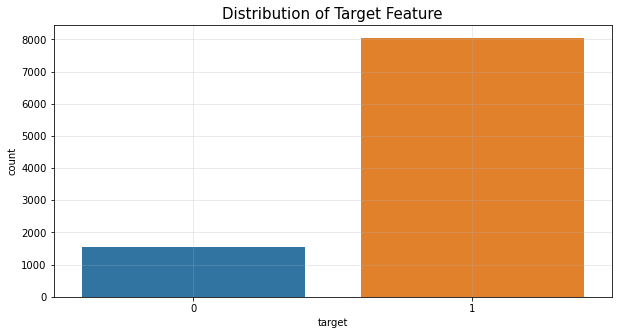

In [28]:
# distribution of data for target class:
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=orig_data_copy)
plt.grid(True, alpha=0.3)
plt.title('Distribution of Target Feature', fontsize=15)

<li><strong>The distribution of Target feature seems to be unsymmetric and hence, we can use SMOTE-NC for oversampling the minority class.</strong></li>

<h3>Training SVC Model without Oversampling:</h3>

In [29]:
# adding 'target' to the final set of feats:
current_feats.append('target')
data_to_split = orig_data_copy[current_feats].copy()

In [30]:
# function for dividing the data into training and validation data:
def get_train_val_data(data, fraction):
    # computing indexes till which we want to consider data for training and validation:
    data_sampled = data.sample(frac=1)
    idx_total_data = int(fraction*len(data_sampled))
    idx_pos_class = int(fraction*len(data_sampled[data_sampled['target']==1]))
    idx_neg_class = idx_total_data - idx_pos_class

    # creating data for both positive and negative classes:
    data_pos_class = data_sampled[data_sampled['target']==1]
    data_neg_class = data_sampled[data_sampled['target']==0]

    # creating training data:
    neg_class_train = data_neg_class[:idx_neg_class]
    pos_class_train = data_pos_class[:idx_pos_class]
    training_data = pd.concat([neg_class_train, pos_class_train]).sample(frac=1)

    # creating validation data:
    neg_class_val = data_neg_class[idx_neg_class:]
    pos_class_val = data_pos_class[idx_pos_class:]
    val_data = pd.concat([neg_class_val, pos_class_val]).sample(frac=1)

    # creating labels for training data:
    y_train = training_data['target']
    x_train = training_data.drop(['target'], axis=1)

    # creating labels for validation data:
    y_val = val_data['target']
    x_val = val_data.drop(['target'], axis=1)
    return x_train, y_train, x_val, y_val

In [31]:
# dividing the data into training and validation data:
x_train, y_train, x_val, y_val = get_train_val_data(data_to_split, 0.9)

In [32]:
# Shapes of Training and Validation Data:
print('Training Data:')
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Instances of Target==1 --> {}'.format(len(y_train[y_train==1])))
print('Instances of Target==0 --> {}'.format(len(y_train[y_train==0])))

print('==========================================')

print('Validation Data:')
print('Shape of x_val: {}'.format(x_val.shape))
print('Shape of y_val: {}'.format(y_val.shape))
print('Instances of Target==1 --> {}'.format(len(y_val[y_val==1])))
print('Instances of Target==0 --> {}'.format(len(y_val[y_val==0])))

Training Data:
Shape of x_train: (8620, 18)
Shape of y_train: (8620,)
Instances of Target==1 --> 7240
Instances of Target==0 --> 1380
Validation Data:
Shape of x_val: (958, 18)
Shape of y_val: (958,)
Instances of Target==1 --> 805
Instances of Target==0 --> 153


In [33]:
# evaluation cell:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, log_loss, confusion_matrix

# plot representing overfitting of the model and how it learns with each new data added:
def learning_overfitting_curves(model, train_data, train_target, val_data, val_target):
    training_error = [] # stores the training error of each step:
    validation_error = [] # stores the validation error of each step:
    for step in range(10, len(train_data)):
        
        # increasing the training data by 1 at each step:
        model.fit(train_data[:step], train_target[:step])
        
        # predictions on training and validation data:
        train_pred = model.predict(train_data[:step])
        val_pred = model.predict(val_data)
        
        # current training and validation error:
        cur_train_error = log_loss(train_target[:step], train_pred)
        cur_val_error = log_loss(val_target, val_pred)
        
        # adding it to list:
        training_error.append(cur_train_error)
        validation_error.append(cur_val_error)
        
    return (training_error, validation_error)
    
# plotting Precision-Recall-Curve and ROC Curve:
def evaluation_plots(model, train_target, train_pred, val_pred_proba, val_target, val_pred,  title, save, learning_curves):
    global models
    global precisions
    global recalls
    global fprs
    global tprs
    global training_errors
    global validation_errors
    global auc_scores
    
    prec_, recall_, threshold_ = precision_recall_curve(val_target, val_pred_proba)
    fpr_, tpr_, thresh_ = roc_curve(val_target, val_pred_proba)
#     training_error, validation_error = learning_overfitting_curves(model, x_train, train_target, x_val, val_pred)
    cur_auc_score = roc_auc_score(val_target, val_pred)
    
    if (save==False):
        # plotting Precision Recall Curve::
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        ax1.plot(prec_, recall_, 'b-o', label=title)
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        ax2.plot(fpr_, tpr_, label=title)
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.text(0.3, 0.1, 'ROC Score --> '+ str(cur_auc_score), fontsize=10, bbox=dict(facecolor='blue', alpha=0.1))
        ax2.legend()

        # plotting learning curves:
#         ax3.plot(np.arange(len(training_error)), training_error, 'b-o', label='Training Error')
#         ax3.plot(np.arange(len(validation_error)), validation_error, 'r-o',  label='Validation Error')
#         ax3.set_xlabel('Number of Steps', fontsize=12)
#         ax3.set_ylabel('Log Loss', fontsize=12)
#         ax3.set_title('Learning Curves', fontsize=15)
#         ax3.grid(True, alpha=0.4)
#         ax3.legend()
    
    else:        
        # saving the data to the globally assigned lists:
        models.append(title)
        precisions.append(tuple(prec_))
        recalls.append(tuple(recall_))
        fprs.append(tuple(fpr_))
        tprs.append(tuple(tpr_))
#         training_errors.append(tuple(training_error))
#         validation_errors.append(tuple(validation_error))
        auc_scores.append(cur_auc_score)
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
        colors = ['orange', 'red', 'green', 'pink', 'blue', 'yellow', 'black']
        current_color = 'none'
        
        # plotting Precision Recall Curve::
        for idx in range(len(models)):
            ax1.plot(precisions[idx], recalls[idx], label=models[idx])
            current_color = colors[:idx+1]
        
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        for idx in range(len(models)):
            ax2.plot(fprs[idx], tprs[idx], label=models[idx])
        
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.legend()
        
        # plotting roc-auc bar chart:
        ax3.bar(models, auc_scores, color=current_color)
        ax3.set_xlabel('Classification Algo', fontsize=12)
        ax3.set_ylabel('AUC Score', fontsize=12)
        ax3.set_title('AUC Bar Chart', fontsize=15)
        ax3.grid(True, alpha=0.4)
        
    if learning_curves:
        plt.figure(figsize=(20, 10))
        k = 1
        for idx in range(len(models)):
            plt.subplot(1, len(models), k)
            plt.plot(np.arange(len(training_errors[idx])), training_errors[idx], 'b--', label='Train Error')
            plt.plot(np.arange(len(validation_errors[idx])), validation_errors[idx], 'r--',  label='Val Error')
            plt.xlabel('Number of Steps', fontsize=10)
            plt.ylabel('Log Loss', fontsize=10)
            plt.title(models[idx], fontsize=12)
            plt.grid(True, alpha=0.4)
            plt.legend()
            k +=1


# evaluation table returns the table comparision between the training and validation metrics:  
def evaluation_table(y_train, y_train_pred, y_val, y_val_pred):
    # training performance metrics:
    accuracy_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    train_perf = [accuracy_train, prec_train, recall_train, f1_train, roc_train]
    
    # validation performance metrics:
    accuracy_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    roc_val = roc_auc_score(y_val, y_val_pred)
    val_perf = [accuracy_val, prec_val, recall_val, f1_val, roc_val]
    
    # forming a table:
    result = []
    for train_p, val_p in zip(train_perf, val_perf):
        result.append((train_p, val_p))
        
    result_table = pd.DataFrame(result, columns=['Training Metrics', 'Validation Metrics'], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score'])
    return result_table

# combining the above functions:
def evaluating_model(best_model, title, save=False, learning_curves=False, show_plots=False):
    
    # predicting probabilities of validation data:
    y_val_pred_proba = np.array(best_model.predict_proba(x_val))[:, 1]
    
    # predicting output:
    y_train_pred = best_model.predict(x_train)
    y_val_pred = best_model.predict(x_val)

    # printing the Evaluation Table:
    eval_result_table = evaluation_table(y_train, y_train_pred, y_val, y_val_pred)
    print('Evaluation Table for '+title)
    print(eval_result_table)
    
    # plotting the ROC and Precision-Recall-Curve:
    if show_plots == True:
        evaluation_plots(best_model, y_train, y_train_pred, y_val_pred_proba, y_val, y_val_pred, title, save, learning_curves)
    
    return True


In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score 

# defining a function which returns the best model:
def search_best_model(estimator, params, search='random'):
    accuracy_scorer = make_scorer(accuracy_score) # making the roc_auc_score as the scoring function
    if search == 'random':
        rand_cv = RandomizedSearchCV(estimator, param_distributions=params, scoring=accuracy_scorer, cv=5, n_jobs=-1)
        rand_cv_search = rand_cv.fit(x_train, y_train)
        best_model_rand = rand_cv_search.best_estimator_
        return best_model_rand
    else:
        grid_cv = GridSearchCV(estimator, param_grid=params, scoring=accuracy_scorer, cv=5, n_jobs=-1)
        grid_cv_search = grid_cv.fit(x_train, y_train)
        best_model_grid = grid_cv_search.best_estimator_
        return best_model_grid

In [149]:
# Hyperparameter Search for Support Vector Machines:
from sklearn.svm import SVC

# instance of Support Vector Classifier:
svc_clf = SVC(probability=True, kernel='rbf', class_weight={0: 0.84, 1: 0.16})

# 1st Grid Search: 
# params = {'C': [0.01, 0.1, 1, 100],
#          'gamma': [0.01, 0.1, 1, 100]}
# Result of 1st Grid Search: SVC(C=100, gamma=0.1, probability=True)

# # 2nd Grid Search:
# params = {'C': [200, 500, 1000],
#          'gamma': [200, 500, 1000]}

# 3rd Grid Search:
params = {'C': [100, 150, 200],
         'gamma': [400, 600, 800]}

best_svc_clf = search_best_model(svc_clf, params, search='random')
fit_status = best_svc_clf.fit_status_

# Checking if the model is perfectly fitted:
if (fit_status == 0):
    print('Model is perfectly fitted')
else:
    print('Invalid Fit')

best_svc_clf

Model is perfectly fitted


SVC(C=100, class_weight={0: 0.84, 1: 0.16}, gamma=400, probability=True)

In [150]:
# evaluating model of SVC:
evaluating_model(best_svc_clf, 'SVC')

Evaluation Table for SVC
           Training Metrics  Validation Metrics
Accuracy                1.0            0.840292
Precision               1.0            0.840292
Recall                  1.0            1.000000
F1-Score                1.0            0.913216
AUC Score               1.0            0.500000


True

In [156]:
test_data = [[-1.46624759e-01,  1.2242e-01,  0.00000000e+00,  8.40336134e-02,   1.64507506e-01, -3.17262703e-03,  0.00000000e+00,  1.00000000e+00,  -5.33564114e+01,  5.07676903e-01,  3.70853209e-02,  0.00000000e+00,   0.00000000e+00,  9.09090909e-01,  2.21340068e-03,  1.00000000e+00,   1.00000000e+00, -8.02998501e-03]]

In [147]:
best_svc_clf.predict_proba(test_data)

array([[0.16042749, 0.83957251]])

In [140]:
# proportion of target==1:
len(data_to_split[data_to_split['target']==0])

1533

In [138]:
len(data_to_split)

9578

In [151]:
# saving this model of SVC:
import pickle
file_handle = open('svc_model_lr_without_oversampling.pkl', 'wb')
pickle.dump(best_svc_clf, file_handle)

In [153]:
fh = open('svc_model_lr_without_oversampling.pkl', 'rb')
svc_model = pickle.load(fh)
fh.close()

In [157]:
svc_model.predict_proba(test_data)

array([[0.16037409, 0.83962591]])

In [161]:
svc_model.predict_proba(x_val[50:70])

array([[0.16030466, 0.83969534],
       [0.16026441, 0.83973559],
       [0.15716431, 0.84283569],
       [0.15801683, 0.84198317],
       [0.16092345, 0.83907655],
       [0.15355527, 0.84644473],
       [0.16024089, 0.83975911],
       [0.16037409, 0.83962591],
       [0.16037409, 0.83962591],
       [0.16037407, 0.83962593],
       [0.1603723 , 0.8396277 ],
       [0.16037409, 0.83962591],
       [0.16025787, 0.83974213],
       [0.15883098, 0.84116902],
       [0.16037407, 0.83962593],
       [0.1572469 , 0.8427531 ],
       [0.16037408, 0.83962592],
       [0.16038222, 0.83961778],
       [0.16037409, 0.83962591],
       [0.15084849, 0.84915151]])

In [162]:
y_val[50:70]

8827    1
1887    1
2095    0
5731    1
3231    1
676     0
7450    1
6512    1
4340    1
717     1
4640    0
9071    0
1855    0
203     1
1194    1
1276    1
7295    1
10      1
8887    1
1866    1
Name: target, dtype: int64

<h2>Dealing with Minority Class -> SMOTE-NC:</h2>

In [35]:
# getting the index of Categorical features since we would be using SMOTE-NC:
index_categorical_feats = []
for feature_idx in range(len(x_encoded.columns)):
    if x_encoded[current_feats[feature_idx]].nunique()<3:
        index_categorical_feats.append(feature_idx)
        print(feature_idx, '-->', current_feats[feature_idx], '----->', x_encoded[current_feats[feature_idx]].nunique())
    else:
        continue

print(index_categorical_feats)

2 --> purpose_credit_card -----> 2
6 --> purpose_educational -----> 2
7 --> credit.policy -----> 2
11 --> pub.rec_0 -----> 2
12 --> purpose_major_purchase -----> 2
15 --> purpose_small_business -----> 2
16 --> pub.rec_1 -----> 2
[2, 6, 7, 11, 12, 15, 16]


In [36]:
# importing SMOTENC:
from imblearn.over_sampling import SMOTENC

In [37]:
# creating more instances of Minority Class and then resampling data: 
sm = SMOTENC(random_state=42, categorical_features=index_categorical_feats)
x_final_res, y_final_res = sm.fit_resample(x_encoded, y_target)
print('Resampling Done....')

Resampling Done....


In [38]:
# Printing Result of Over-Sampling:
print('Before Over-Sampling:')
print('Shape of Training Data: {}'.format(x_encoded.shape))
print('Shape of Target Data: {}'.format(y_target.shape))
print('Number of Class-0 labels: {} and Class-1 labels: {}'.format(len(y_target[y_target==0]), len(y_target[y_target==1])))

print('===========================================')
print('After Over-Sampling:')
print('Shape of Training Data: {}'.format(x_final_res.shape))
print('Shape of Target Data: {}'.format(y_final_res.shape))
print('Number of Class-0 labels: {} and Class-1 labels: {}'.format(len(y_final_res[y_final_res==0]), len(y_final_res[y_final_res==1])))

Before Over-Sampling:
Shape of Training Data: (9017, 18)
Shape of Target Data: (9017,)
Number of Class-0 labels: 1377 and Class-1 labels: 7640
After Over-Sampling:
Shape of Training Data: (15280, 18)
Shape of Target Data: (15280,)
Number of Class-0 labels: 7640 and Class-1 labels: 7640


Text(0.5, 1.0, 'Distribution of Target Feature after Over-Sampling Data')

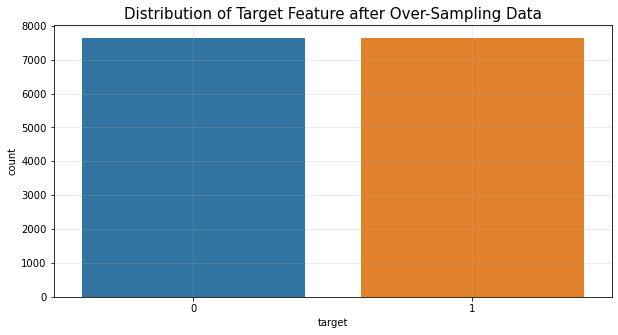

In [39]:
# Countplot of Target Feature of the full data:
plt.figure(figsize=(10, 5))
sns.countplot(y_final_res)
plt.grid(True, alpha=0.3)
plt.title('Distribution of Target Feature after Over-Sampling Data', fontsize=15)

<h3>Creating Training and Validation Data using Stratified Sampling:</h3>
<p>Since, now we have equal number of instances for both the classes, thus we should be focussing on Stratified Sampling of Training and Validation Data.</p>

In [40]:
# creating a function which returns Stratified Sampled Data for training and Validation:
def stratified_sampling_train_val(prop_train_data, full_data, target_feat_data):
    """We know that the target class is binary and the number of instances for both the class are equal, hence perform stratified Sampling"""
    
    full_data['target'] = target_feat_data
    class_0_data = full_data[full_data['target']==0]
    class_1_data = full_data[full_data['target']==1]
    
    total_train_idx = int(prop_train_data*len(full_data)) # total count of train data:
    class_idx = total_train_idx//2 # since we want equal data from both the classes:
    
    # creating train data:
    train_0_data = class_0_data[:class_idx]
    train_1_data = class_1_data[:class_idx]
    full_train_data = pd.concat([train_0_data, train_1_data], axis=0).sample(frac=1) # shuffling the data as well
    train_target = full_train_data['target'] 
    train_data = full_train_data.drop(['target'], axis=1)
    
    # creating val data:
    val_0_data = class_0_data[class_idx:]
    val_1_data = class_1_data[class_idx:]
    full_val_data = pd.concat([val_0_data, val_1_data], axis=0).sample(frac=1) # shuffling the data as well
    val_target = full_val_data['target']
    val_data = full_val_data.drop(['target'], axis=1)
    
    return (train_data, train_target, val_data, val_target)

In [41]:
# Creating Copy of Data:
x_final_res_copy = x_final_res.copy()
y_final_res_copy = y_final_res.copy()

# training and validation data with training data to be 90% of the total data:
x_train, y_train, x_val, y_val = stratified_sampling_train_val(0.90, x_final_res_copy, y_final_res_copy)

In [42]:
# Shapes of Training and Validation Data:
print('Training Data:')
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))

print('==========================================')

print('Validation Data:')
print('Shape of x_val: {}'.format(x_val.shape))
print('Shape of y_val: {}'.format(y_val.shape))

Training Data:
Shape of x_train: (13752, 18)
Shape of y_train: (13752,)
Validation Data:
Shape of x_val: (1528, 18)
Shape of y_val: (1528,)


Text(0.5, 1.0, 'Target Class for Validation Data')

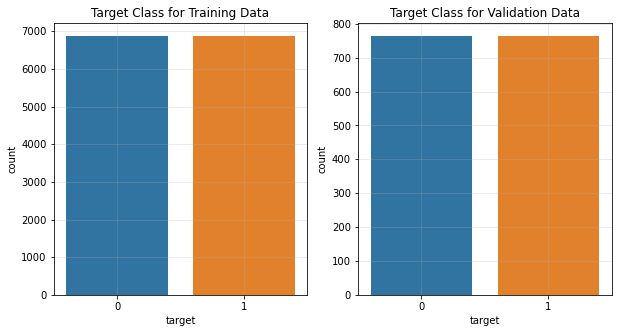

In [43]:
# Countplot to see the distribution of Target Data is equal for both Training and Validation Data:

# For Training Data:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
sns.countplot(y_train, ax=ax1)
ax1.grid(True, alpha=0.3)
ax1.set_title('Target Class for Training Data')

# For Validation Data:
sns.countplot(y_val, ax=ax2)
ax2.grid(True, alpha=0.3)
ax2.set_title('Target Class for Validation Data')

In [39]:
honey_singh

NameError: name 'honey_singh' is not defined

<h2>Training Machine Learning Models and Evaluating them:</h2>

In [44]:
# globally initializing variables for storing relevant data:
models = []
precisions = []
recalls = []
fprs = []
tprs = []
training_errors = []
validation_errors = []
auc_scores = []

In [45]:
# evaluation cell:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, log_loss, confusion_matrix

# plot representing overfitting of the model and how it learns with each new data added:
def learning_overfitting_curves(model, train_data, train_target, val_data, val_target):
    training_error = [] # stores the training error of each step:
    validation_error = [] # stores the validation error of each step:
    for step in range(10, len(train_data)):
        
        # increasing the training data by 1 at each step:
        model.fit(train_data[:step], train_target[:step])
        
        # predictions on training and validation data:
        train_pred = model.predict(train_data[:step])
        val_pred = model.predict(val_data)
        
        # current training and validation error:
        cur_train_error = log_loss(train_target[:step], train_pred)
        cur_val_error = log_loss(val_target, val_pred)
        
        # adding it to list:
        training_error.append(cur_train_error)
        validation_error.append(cur_val_error)
        
    return (training_error, validation_error)
    
# plotting Precision-Recall-Curve and ROC Curve:
def evaluation_plots(model, train_target, train_pred, val_pred_proba, val_target, val_pred,  title, save, learning_curves):
    global models
    global precisions
    global recalls
    global fprs
    global tprs
    global training_errors
    global validation_errors
    global auc_scores
    
    prec_, recall_, threshold_ = precision_recall_curve(val_target, val_pred_proba)
    fpr_, tpr_, thresh_ = roc_curve(val_target, val_pred_proba)
#     training_error, validation_error = learning_overfitting_curves(model, x_train, train_target, x_val, val_pred)
    cur_auc_score = roc_auc_score(val_target, val_pred)
    
    if (save==False):
        # plotting Precision Recall Curve::
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        ax1.plot(prec_, recall_, 'b-o', label=title)
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        ax2.plot(fpr_, tpr_, label=title)
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.text(0.3, 0.1, 'ROC Score --> '+ str(cur_auc_score), fontsize=10, bbox=dict(facecolor='blue', alpha=0.1))
        ax2.legend()

        # plotting learning curves:
#         ax3.plot(np.arange(len(training_error)), training_error, 'b-o', label='Training Error')
#         ax3.plot(np.arange(len(validation_error)), validation_error, 'r-o',  label='Validation Error')
#         ax3.set_xlabel('Number of Steps', fontsize=12)
#         ax3.set_ylabel('Log Loss', fontsize=12)
#         ax3.set_title('Learning Curves', fontsize=15)
#         ax3.grid(True, alpha=0.4)
#         ax3.legend()
    
    else:        
        # saving the data to the globally assigned lists:
        models.append(title)
        precisions.append(tuple(prec_))
        recalls.append(tuple(recall_))
        fprs.append(tuple(fpr_))
        tprs.append(tuple(tpr_))
#         training_errors.append(tuple(training_error))
#         validation_errors.append(tuple(validation_error))
        auc_scores.append(cur_auc_score)
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
        colors = ['orange', 'red', 'green', 'pink', 'blue', 'yellow', 'black']
        current_color = 'none'
        
        # plotting Precision Recall Curve::
        for idx in range(len(models)):
            ax1.plot(precisions[idx], recalls[idx], label=models[idx])
            current_color = colors[:idx+1]
        
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        for idx in range(len(models)):
            ax2.plot(fprs[idx], tprs[idx], label=models[idx])
        
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.legend()
        
        # plotting roc-auc bar chart:
        ax3.bar(models, auc_scores, color=current_color)
        ax3.set_xlabel('Classification Algo', fontsize=12)
        ax3.set_ylabel('AUC Score', fontsize=12)
        ax3.set_title('AUC Bar Chart', fontsize=15)
        ax3.grid(True, alpha=0.4)
        
    if learning_curves:
        plt.figure(figsize=(20, 10))
        k = 1
        for idx in range(len(models)):
            plt.subplot(1, len(models), k)
            plt.plot(np.arange(len(training_errors[idx])), training_errors[idx], 'b--', label='Train Error')
            plt.plot(np.arange(len(validation_errors[idx])), validation_errors[idx], 'r--',  label='Val Error')
            plt.xlabel('Number of Steps', fontsize=10)
            plt.ylabel('Log Loss', fontsize=10)
            plt.title(models[idx], fontsize=12)
            plt.grid(True, alpha=0.4)
            plt.legend()
            k +=1


# evaluation table returns the table comparision between the training and validation metrics:  
def evaluation_table(y_train, y_train_pred, y_val, y_val_pred):
    # training performance metrics:
    accuracy_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    train_perf = [accuracy_train, prec_train, recall_train, f1_train, roc_train]
    
    # validation performance metrics:
    accuracy_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    roc_val = roc_auc_score(y_val, y_val_pred)
    val_perf = [accuracy_val, prec_val, recall_val, f1_val, roc_val]
    
    # forming a table:
    result = []
    for train_p, val_p in zip(train_perf, val_perf):
        result.append((train_p, val_p))
        
    result_table = pd.DataFrame(result, columns=['Training Metrics', 'Validation Metrics'], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score'])
    return result_table

# combining the above functions:
def evaluating_model(best_model, title, save=False, learning_curves=False, show_plots=False):
    
    # predicting probabilities of validation data:
    y_val_pred_proba = np.array(best_model.predict_proba(x_val))[:, 1]
    
    # predicting output:
    y_train_pred = best_model.predict(x_train)
    y_val_pred = best_model.predict(x_val)

    # printing the Evaluation Table:
    eval_result_table = evaluation_table(y_train, y_train_pred, y_val, y_val_pred)
    print('Evaluation Table for '+title)
    print(eval_result_table)
    
    # plotting the ROC and Precision-Recall-Curve:
    if show_plots == True:
        evaluation_plots(best_model, y_train, y_train_pred, y_val_pred_proba, y_val, y_val_pred, title, save, learning_curves)
    
    return True


<h3>1) Logistic Regression:</h3>
<p> Hyper-Parameters to control: 
<ol>
    <li>Regularization Parameter - <code>C</code></li>
    </ol>
</p>

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [41]:
# defining a function which returns the best model:
def search_best_model(estimator, params, search='random'):
    accuracy_scorer = make_scorer(accuracy_score) # making the roc_auc_score as the scoring function
    if search == 'random':
        rand_cv = RandomizedSearchCV(estimator, param_distributions=params, scoring=accuracy_scorer, cv=5, n_jobs=-1)
        rand_cv_search = rand_cv.fit(x_train, y_train)
        best_model_rand = rand_cv_search.best_estimator_
        return best_model_rand
    else:
        grid_cv = GridSearchCV(estimator, param_grid=params, scoring=f1_scorer, cv=5, n_jobs=-1)
        grid_cv_search = grid_cv.fit(x_train, y_train)
        best_model_grid = grid_cv_search.best_estimator_
        return best_model_grid

In [42]:
# training various Logistic Regression Models:
log_reg = LogisticRegression(random_state=42)
# First Search:
# values_c = {'C': [1, 10, 100, 1000, 10000, 100000]}

# Second Search:
# values_c = {'C':[0.5, 1, 1.5, 2, 4, 6]}

# Second Search:
values_c = {'C':[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]}

log_reg_best = search_best_model(log_reg, values_c)
log_reg_best

LogisticRegression(C=1.5, random_state=42)

In [43]:
# evaluating the best Logistic Regression Model:
evaluating_model(log_reg_best, 'Log Reg')

Evaluation Table for Log Reg
           Training Metrics  Validation Metrics
Accuracy           0.679538            0.462042
Precision          0.693041            0.403974
Recall             0.644561            0.159686
F1-Score           0.667923            0.228893
AUC Score          0.679538            0.462042


True

In [44]:
# increasing regularization:
log_reg_clf = LogisticRegression(random_state=42, C=1000).fit(x_train, y_train)

# evaluating the best Logistic Regression Model:
evaluating_model(log_reg_clf, 'Log Reg')

Evaluation Table for Log Reg
           Training Metrics  Validation Metrics
Accuracy           0.678374            0.461387
Precision          0.689773            0.403909
Recall             0.648342            0.162304
F1-Score           0.668416            0.231559
AUC Score          0.678374            0.461387


True

<li><strong>Even after increasing Regularization didn't, none of the metrics improved. This means, we should ideally rely on the model whose hyperparameters have been tuned.</li>

Evaluation Table for Log Reg
           Training Metrics  Validation Metrics
Accuracy           0.679538            0.462042
Precision          0.693041            0.403974
Recall             0.644561            0.159686
F1-Score           0.667923            0.228893
AUC Score          0.679538            0.462042


True

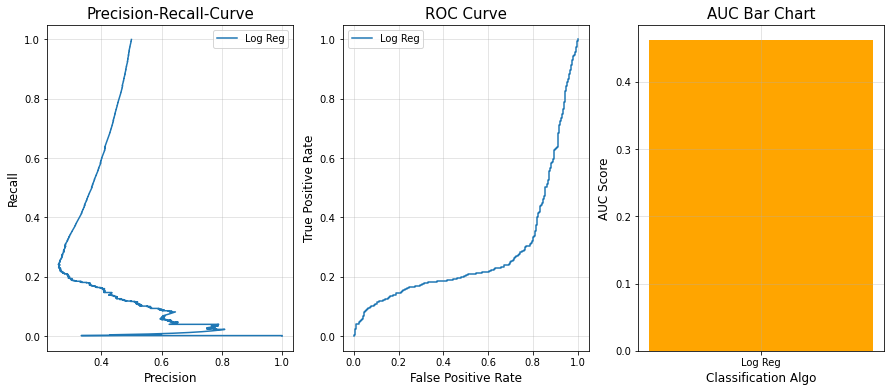

In [45]:
# evaluating the best Logistic Regression Model:
evaluating_model(log_reg_best, 'Log Reg', save=True, show_plots=True)

<h3>2) Decision Tress Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>criterion</code> - Keep it default i.e. <code>gini</code></li>
    <li><code>max_depth</code> - Maximum Depth of the tree.</li>
    <li><code>min_samples_split</code> - Minimum number of samples required to split the internal node.</li>
    <li><code>min_samples_leaf</code> - Minimum number of samples required to be present at the leaf node.</li>
    <li><code>max_features</code> - Maximum number of features considered during the best feature for splitting the data.</li>
    <li><code>max_leaf_nodes</code> - Maximum number of leaf nodes to be present</li>
    <li><code>class_weight</code> - Keep it <code>'balanced'</code>.</li>
    <li><code>sklearn.tree.plot_tree(dec_clf)</code> - Used to plot the tree's logic about how the tree is constructed.</li>
     </ol>
</p>

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Hyperparameter Tuning of Decision Trees Classifier:

dec_tree_clf = DecisionTreeClassifier(random_state=42)

# First Grid Search:
# params = {'max_depth': [5, 20, 50, 60, 70],
#          'min_samples_split': [5, 20, 50, 70, 100, 200],
#          'min_samples_leaf': [5, 20, 50, 70, 100, 200],
#          'max_features': [5, 20, 50, 70, 100, 200],
#          'max_leaf_nodes': [5, 20, 50, 70, 100, 200]}

# 2nd Grid Search:
# params = {'max_depth': [10, 15, 20, 25],
#          'min_samples_split': [40, 50, 60, 70, 80, 90],
#          'min_samples_leaf': [10, 20, 30 ,40],
#          'max_features': [3, 5, 8],
#          'max_leaf_nodes': [10, 20, 30, 40]}

# 3rd Grid Search:
params = {'max_depth': [18, 19, 20, 22, 24, 26, 28],
         'min_samples_split': [85, 88, 90, 92, 95, 100],
         'min_samples_leaf': [38, 39, 40, 41, 42, 43, 44, 45, 48, 50],
         'max_features': [6, 7, 8],
         'max_leaf_nodes': [38, 39, 40, 41, 42, 43, 44, 45]}


dec_tree_best = search_best_model(dec_tree_clf, params)
dec_tree_best

DecisionTreeClassifier(max_depth=22, max_features=8, max_leaf_nodes=45,
                       min_samples_leaf=44, min_samples_split=100,
                       random_state=42)

In [48]:
# evaluating the best Decision Trees Classifier Model:
evaluating_model(dec_tree_best, 'Dec Tree')

Evaluation Table for Dec Tree
           Training Metrics  Validation Metrics
Accuracy           0.825771            0.527487
Precision          0.776339            0.558333
Recall             0.915212            0.263089
F1-Score           0.840075            0.357651
AUC Score          0.825771            0.527487


True

<li>Insight: <strong>Even after applying regularization, the performance on validation data is not improving. This is the best performance we got for Decision Trees.</strong></li>

Evaluation Table for Dec Tree
           Training Metrics  Validation Metrics
Accuracy           0.825771            0.527487
Precision          0.776339            0.558333
Recall             0.915212            0.263089
F1-Score           0.840075            0.357651
AUC Score          0.825771            0.527487


True

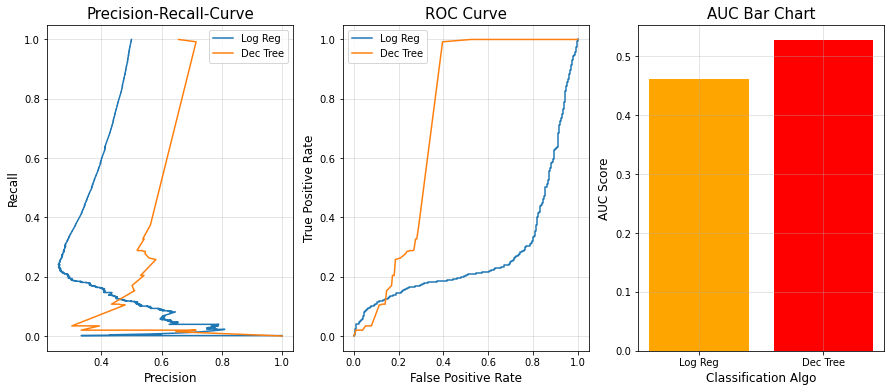

In [49]:
# evaluating the best Decision Trees Classifier Model:
evaluating_model(dec_tree_best, 'Dec Tree', save=True, show_plots=True)

<h3>3) Random Forest Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>n_estimators:</code>Number of Decision Trees to train. It also resembles the number of bootstrapped samples to be created since each Decision Tree is trained on 1 bootstrapped sample.</li>
    <li><code>criterion:</code>Keep it to default i.e. 'gini'.</li>
    <li><code>max_depth:</code>It refers to the maximum depth of the trees/stumps.</li>
    <li><code>min_samples_split:</code>It refers to the minimum number of samples required to split an internal node.</li>
    <li><code>min_samples_leaf:</code>Minimum number of samples required to be at the leaf node.</li>
    <li><code>max_features:</code>Maximum number of features required to be considered while splitting the data based upon a Feature (information gain).</li>
    <li><code>max_leaf_nodes:</code>Maximum Leaf Nodes required to be present in each tree.</li>
    <li><code>bootstrap:</code>Keep it default i.e. True.</li>
    <li><code>oob_score:</code>Can be kept as True to evaluate the model.</li>
     </ol>
</p>

In [50]:
# Hyperparameter Search for Random Forest Model:
from sklearn.ensemble import RandomForestClassifier
rand_forest_clf = RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=True, random_state=42)

# 1st Grid Search:
# params = {'n_estimators': [20, 50, 80, 100, 150, 200, 300],
#           'max_depth':[1, 5, 10, 15, 20, 30, 50],
#           'min_samples_split': [1, 5, 10, 15, 20],
#           'min_samples_leaf': [1, 5, 10, 15, 20],
#           'max_features': [1, 5, 10, 15, 20],
#           'max_leaf_nodes': [1, 5, 10, 15, 20]}

# 2nd Grid Search:
# params = {'n_estimators': [160, 180, 200, 220, 240],
#           'max_depth':[5, 10, 15, 18, 20],
#           'min_samples_split': [3, 5, 8, 10],
#           'min_samples_leaf': [2, 5, 8, 10],
#           'max_features': [5, 10, 15],
#           'max_leaf_nodes': [7, 8, 9, 10, 12, 14]}

# 3rd Grid Search:
params = {'n_estimators': [150, 155, 160, 165, 170],
          'max_depth':[10],
          'min_samples_split': [8, 10, 15, 20, 30],
          'min_samples_leaf': [2, 5],
          'max_features': [15],
          'max_leaf_nodes': [9, 10, 12]}


best_rand_forest_clf = search_best_model(rand_forest_clf, params)
print('Out of Bag Evaluation Score for currently trained Random Forest Model-->', best_rand_forest_clf.oob_score_)
best_rand_forest_clf

Out of Bag Evaluation Score for currently trained Random Forest Model--> 0.8064281559045957


RandomForestClassifier(max_depth=10, max_features=15, max_leaf_nodes=12,
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150, oob_score=True, random_state=42)

In [51]:
# Out of Bag Evaluation Score for Random Forest trained:
#  2nd Random Forest Model OOB Score--> 0.8053374054682956
#  3rd Random Forest Model OOB Score--> 0.8065735892961023

In [52]:
# evaluating Best Random Forest Model:
evaluating_model(best_rand_forest_clf, 'Rand Forest')

Evaluation Table for Rand Forest
           Training Metrics  Validation Metrics
Accuracy           0.807155            0.522251
Precision          0.735032            0.537611
Recall             0.960588            0.318063
F1-Score           0.832808            0.399671
AUC Score          0.807155            0.522251


True

Evaluation Table for Rand Forest
           Training Metrics  Validation Metrics
Accuracy           0.807155            0.522251
Precision          0.735032            0.537611
Recall             0.960588            0.318063
F1-Score           0.832808            0.399671
AUC Score          0.807155            0.522251


True

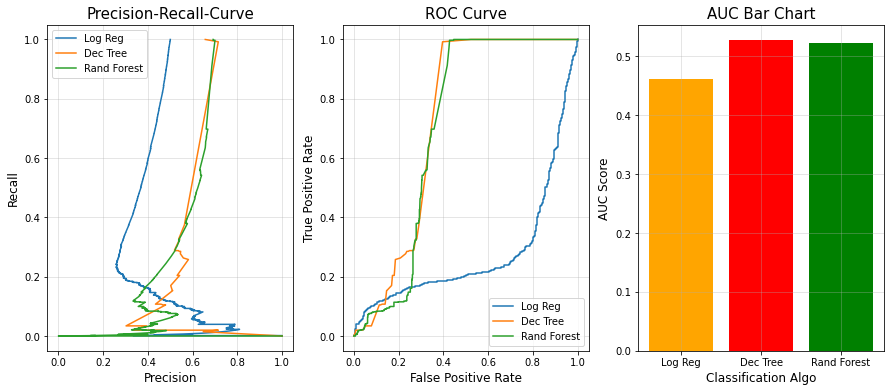

In [53]:
# evaluating and saving Best Random Forest Model:
evaluating_model(best_rand_forest_clf, 'Rand Forest', save=True, show_plots=True)

<h3>Investiagting the Misclassified Instances:</h3>

In [54]:
# making predictions and creating data:
rf_pred = best_rand_forest_clf.predict(x_val)
data_inspect = x_val.copy()
data_inspect['target'] = y_val
data_inspect['rf_pred'] = rf_pred
data_inspect.head()

,log.installment,fico,purpose_credit_card,revol.util,poss.getting.loan,loan.info,purpose_educational,credit.policy,log.int.rate,dti,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value,target,rf_pred
8071,0.442753,0.302326,0,0.528571,0.040496,0.115992,0,0,0.425493,0.113151,0.088763,1,0,0.060606,0.028402,0,0,0.024756,1,1
15128,0.909645,0.731001,0,0.094780,0.003961,0.302758,0,1,0.371934,0.553030,0.208859,1,0,0.024576,0.031678,0,0,0.177019,0,0
14904,0.691505,0.512133,0,0.372496,0.008810,0.163644,0,1,0.420718,0.641566,0.167801,1,0,0.060606,0.099911,0,0,0.232268,0,1
8900,0.051153,0.558140,0,0.160504,0.008269,0.010194,0,0,0.391435,0.684246,0.225317,1,0,0.060606,0.364333,0,0,0.251622,1,1
15241,0.940737,0.461363,0,0.706643,0.000000,0.313671,0,1,0.682665,0.604106,0.232712,1,0,0.000000,0.087696,0,0,0.577665,0,1


In [55]:
# creating data for positive and negative class of the target feature:
pos_class_data = data_inspect[data_inspect['target']==1]
neg_class_data = data_inspect[data_inspect['target']==0]

In [56]:
# misclassified data for both the classes:
mis_pos_data = pos_class_data[pos_class_data['rf_pred']==0]
mis_neg_data = neg_class_data[neg_class_data['rf_pred']==1]

In [57]:
# confusion matrix for understanding the number of correctly classified and misclassified instances:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(data_inspect['target'], data_inspect['rf_pred'])
conf_mat = pd.DataFrame(conf_matrix, columns=['Predicted-0', 'Predicted-1'], index=['Actual-0', 'Actual-1'])
print('Confusion Matrix for Random Forest Model on Validation Data:')
conf_mat

Confusion Matrix for Random Forest Model on Validation Data:


,Predicted-0,Predicted-1
Actual-0,555,209
Actual-1,521,243


In [58]:
# num feats to be analysed for actual target==1 and for misclassified instances:
num_feats = []
target_1_data = orig_data_copy[orig_data_copy['target']==1][x_val.columns]
for feat in target_1_data.columns:
    if target_1_data[feat].nunique()>3:
        num_feats.append(feat)
        
print('Number of Numerical Features -->', len(num_feats), '\n')
print('Numerical Features', num_feats)

Number of Numerical Features --> 11 

Numerical Features ['log.installment', 'fico', 'revol.util', 'poss.getting.loan', 'loan.info', 'log.int.rate', 'dti', 'fico.to.delinq.2yrs', 'inq.last.6mths', 'revol.bal.to.annual.income', 'credit.value']


In [59]:
# function which plots the distribution of numerical data:
def distribution_num_feats(data, num_feats):
    plt.figure(figsize=(18, 10))
    k = 1
    for feat in num_feats:
        plt.subplot(2, 6, k)
        sns.distplot(data[feat], color='darkred')
        plt.grid(True, alpha=0.3)
        k +=1

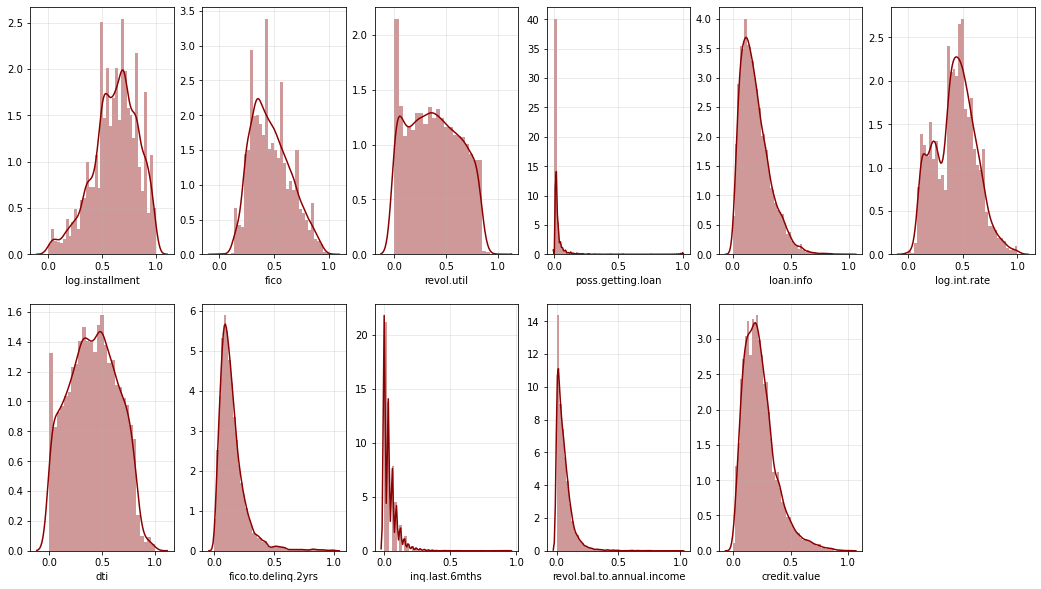

In [60]:
# distribution of actual target==1 data:
distribution_num_feats(target_1_data, num_feats)

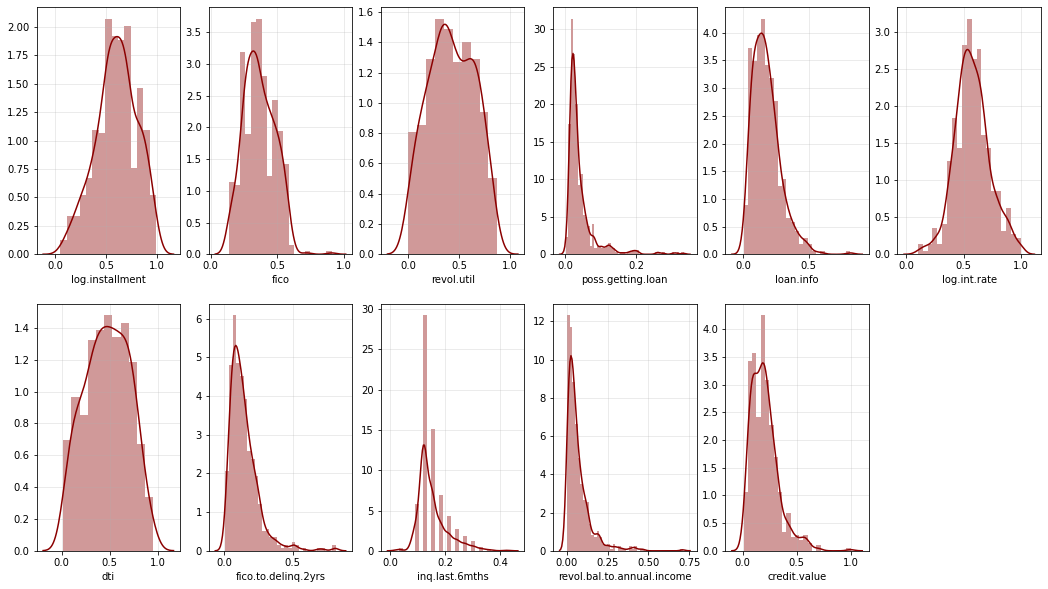

In [61]:
# distribution of misclassified data which is actually 1 but predicted as 0:
distribution_num_feats(mis_pos_data, num_feats)

<strong>For now, I would be training Support Vector CLassifier and see how the data is modelled using this algorithm. Further, later on, I would continue with the inspection of this misclassified data.</strong>

SyntaxError: invalid syntax (<ipython-input-62-265c40fa938c>, line 1)

<h3>4) Support Vector Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>C</code>: This is the regularization parameter i.e. if 'C' is large, then regularization is less and vice versa.</li>
    <li><code>kernel</code>: The kernel or mapping function which is used to transform the original data to new space in order to find the linear decision boundary in that new space.</li>
    <li><code>gamma</code>: This is specifically used in 'rbf' kernel where gamma=1/(2*(variance)). Thus, if gamma is high, variance or standard deviation of the Gaussian Function is less and vice versa. Th gaussian function is used to describe extent of each data point while converting it to the new space. </li>
    <li><code>probability</code>: Keep it True.</li>
   </ol>
</p>

In [ ]:
# Hyperparameter Search for Support Vector Machines:
from sklearn.svm import SVC
# 1st Grid Search:
svc_clf = SVC(probability=True, kernel='rbf')

# 1st Grid Search:
# params = {'C': [0.001, 0.01, 0.1, 1, 100],
#          'gamma': [0.001, 0.01, 0.1, 1, 100]}
# After 1st Grid Search, selected params: {'C'=100, 'gamma'=1}

# 2nd Grid Search:
# params = {'C': [100, 1000, 5000],
#          'gamma': [1, 20, 50]}
# Result for 2nd Random Search: SVC(C=100, gamma=50, probability=True) 

# # 3rd Grid Search:
# params = {'C': [100, 200, 300],
#          'gamma': [50, 80, 90]}
# After 3rd Grid Search, the model chosen is: SVC(C=100, gamma=90, probability=True)

# Still a bit of improvement is required:
# 4th Grid Search:
params = {'C': [100],
         'gamma': [85, 90, 95, 99]}

best_svc_clf = search_best_model(svc_clf, params, search='random')
fit_status = best_svc_clf.fit_status_

# Checking if the model is perfectly fitted:
if (fit_status == 0):
    print('Model is perfectly fitted')
else:
    print('Invalid Fit')

best_svc_clf

In [46]:
from sklearn.svm import SVC
best_svc_model = SVC(C=100, gamma=99, probability=True)
best_svc_model.fit(x_train, y_train)

SVC(C=100, gamma=99, probability=True)

In [49]:
# making predictions:
best_svc_model.predict(x_val[:10])

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [48]:
# saving the model using joblib:
import joblib

# saving the file in the current directory:
joblib_file = "joblib_svc_lr_model.pkl"
joblib.dump(best_svc_model, joblib_file)

['joblib_svc_lr_model.pkl']

In [49]:
# loading the model:
joblib_svc_model = joblib.load("joblib_svc_lr_model.pkl")
joblib_svc_model

SVC(C=100, gamma=99, probability=True)

In [50]:
joblib_svc_model.predict_proba(x_val[:20])

array([[9.86545811e-01, 1.34541893e-02],
       [1.86757230e-01, 8.13242770e-01],
       [1.04094758e-01, 8.95905242e-01],
       [1.86881382e-01, 8.13118618e-01],
       [2.13152081e-01, 7.86847919e-01],
       [1.27381893e-01, 8.72618107e-01],
       [1.08263905e-01, 8.91736095e-01],
       [1.04177812e-01, 8.95822188e-01],
       [1.22214218e-01, 8.77785782e-01],
       [9.17913209e-01, 8.20867908e-02],
       [1.06673657e-01, 8.93326343e-01],
       [1.04384021e-01, 8.95615979e-01],
       [9.72433917e-01, 2.75660827e-02],
       [1.11736805e-01, 8.88263195e-01],
       [9.99536299e-01, 4.63700665e-04],
       [9.98571692e-01, 1.42830823e-03],
       [1.18053993e-01, 8.81946007e-01],
       [9.52450133e-01, 4.75498672e-02],
       [9.96494522e-01, 3.50547798e-03],
       [1.08436378e-01, 8.91563622e-01]])

In [ ]:
# evaluating Best Support Vector Classifier:
evaluating_model(best_svc_clf, 'SVC')

In [ ]:
# evaluating Best Support Vector Classifier:
evaluating_model(best_svc_clf, 'SVC', save=True, show_plots=True)

Evaluation Table for SVC
           Training Metrics  Validation Metrics
Accuracy                1.0            0.948298
Precision               1.0            0.925466
Recall                  1.0            0.975131
F1-Score                1.0            0.949649
AUC Score               1.0            0.948298


True

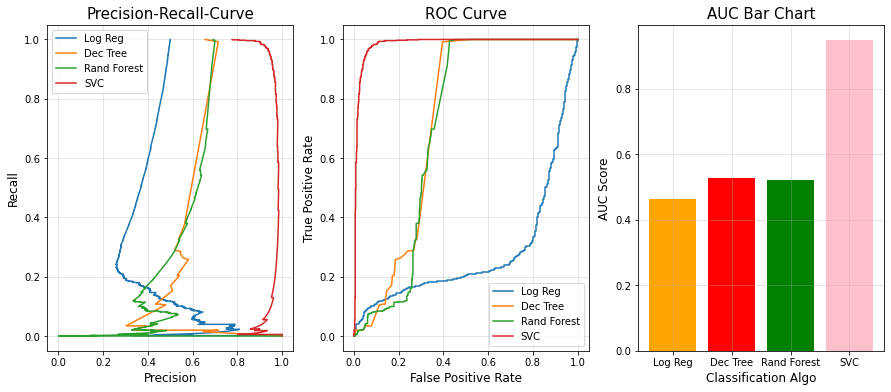

In [66]:
# evaluating Best Support Vector Classifier:
evaluating_model(svc_model, 'SVC', save=True, show_plots=True)

<h3>Planning and Building the Logic for Backend Processing:</h3>

In [71]:
x_val.columns

Index(['log.installment', 'fico', 'purpose_credit_card', 'revol.util',
       'poss.getting.loan', 'loan.info', 'purpose_educational',
       'credit.policy', 'log.int.rate', 'dti', 'fico.to.delinq.2yrs',
       'pub.rec_0', 'purpose_major_purchase', 'inq.last.6mths',
       'revol.bal.to.annual.income', 'purpose_small_business', 'pub.rec_1',
       'credit.value'],
      dtype='object')

In [68]:
x_val.iloc[1, :]

log.installment               0.909645
fico                          0.731001
purpose_credit_card           0.000000
revol.util                    0.094780
poss.getting.loan             0.003961
loan.info                     0.302758
purpose_educational           0.000000
credit.policy                 1.000000
log.int.rate                  0.371934
dti                           0.553030
fico.to.delinq.2yrs           0.208859
pub.rec_0                     1.000000
purpose_major_purchase        0.000000
inq.last.6mths                0.024576
revol.bal.to.annual.income    0.031678
purpose_small_business        0.000000
pub.rec_1                     0.000000
credit.value                  0.177019
Name: 15128, dtype: float64

In [53]:
# imp num features and categorical features for the final data:
imp_cat_feats = imp_cat_feats = ['purpose_credit_card', 'purpose_educational', 'credit.policy', 'pub.rec_0', 'purpose_major_purchase', 'purpose_small_business', 'pub.rec_1']
imp_num_feats = ['log.installment',
 'fico',
 'revol.util',
 'poss.getting.loan',
 'loan.info',
 'log.int.rate',
 'dti',
 'fico.to.delinq.2yrs',
 'inq.last.6mths',
 'revol.bal.to.annual.income',
 'credit.value']

In [54]:
# function for preprocessing data:
# data will be inputted in json format from Front End and would be sent through API as POST request:

def engineer_new_feats(data):
    # engineering features in realtime:
    data['int.rate'] = data['int.rate']/100
    data['log.int.rate'] = np.log(data['int.rate']+1)
    data['log.installment'] = np.log(data['installment']+1)
    data['poss.getting.loan'] = (data['inq.last.6mths'])/(data['dti']+1)
    data['loan.info'] = (data['installment']*data['int.rate'])/data['annual.inc']
    data['fico.to.delinq.2yrs'] = (data['fico']*data['annual.inc'])/(data['delinq.2yrs']+1)
    data['credit.value'] = data['days.with.cr.line']/(data['delinq.2yrs']+1)
    data['revol.bal.to.annual.inc'] = data['revol.bal']/data['annual.inc']
    return data

In [55]:
# now, we also need to preprocess the data based upon Min-Max Scaling so that all the features 
# have same scale:

def scaling_num_data(data, imp_num_feats):
    min_val_feats = [3.3464, 612.0, 0.0, 0.0, 0.00010, 0.05826, 0.0, 1906560.00, 0.0, 203.357, 0.0]
    range_feats = [3.500, 215, 119, 11.25, 0.0314199, 0.12877, 29.96, 283602058.065, 33, 17437.60, 3.65463]
    min_max_data = {}

    for num_feat, min_val_feat, range_feat in zip(imp_num_feats, min_val_feats, range_feats):
        min_max_data[num_feat] = {'min_val': min_val_feat, 'range_val': range_feat}
        
    # preprocessing numerical data:
    for feat in imp_num_feats:
        data[feat] = (data[feat] - min_max_data[feat]['min_val'])/min_max_data[feat]['range_val']
        
    return data

In [56]:
# preprocessing Categorical Features:
# initially we start with assigning each feature's value == 0
def encoding_cat_feats(data, imp_cat_feats):
    feats_updated = []

    # assigning values for purchase related categorical feats:
    if (data['purpose'] == 'Credit Card'):
        data['purpose_credit_card'] = 1
        feats_updated.append('purpose_credit_card')
        
    elif (data['purpose'] == 'Educational'):
        data['purpose_educational'] = 1
        feats_updated.append('purpose_educational')
        
    elif (data['purpose'] == 'Major Purchase'):
        data['purpose_major_purchase'] = 1
        feats_updated.append('purpose_major_purchase')
        
    elif (data['purpose'] == 'Small Business'):
        data['purpose_small_business'] = 1
        feats_updated.append('purpose_small_business')
    else:
        pass

    # assigning values for pub.rec related categorical feats:
    if (data['pub.rec'] == 0):
        data['pub.rec_0'] = 1
        feats_updated.append('pub.rec_0')
        
    elif (data['pub.rec'] == 1):
        data['pub.rec_1'] = 1
        feats_updated.append('pub.rec_1')
        
    else:
        pass

    # assigning values for credit.policy:
    if (data['credit.policy'] == 'Yes'):
        data['credit.policy'] = 1
        feats_updated.append('credit.policy')
    else:
        data['credit.policy'] = 0
     
    # non-updated feats:
    non_updated_feats = list(set(imp_cat_feats).symmetric_difference(set(feats_updated)))
    
    # assigning the non-updated feats to 0:
    for feat in non_updated_feats:
        data[feat] = 0.0
        
    return data

In [57]:
# testing the encoding_cat_feats():
test_data = {'purpose': 'Major Purchase', 
            'pub.rec': 0,
            'credit.policy': 'Yes'}

encoding_cat_feats(test_data, imp_cat_feats)

{'purpose': 'Major Purchase',
 'pub.rec': 0,
 'credit.policy': 1,
 'purpose_major_purchase': 1,
 'pub.rec_0': 1,
 'purpose_credit_card': 0.0,
 'pub.rec_1': 0.0,
 'purpose_educational': 0.0,
 'purpose_small_business': 0.0}

In [58]:
# bringing the data in the form such that it can be passed to the model:

def final_data_to_pass(data):
    final_data_pass = np.array([data['log.installment'],
                              data['fico'],
                              data['purpose_credit_card'],
                              data['revol.util'],
                              data['poss.getting.loan'],
                              data['loan.info'],
                              data['purpose_educational'],
                              data['credit.policy'],
                              data['log.int.rate'],
                              data['dti'],
                              data['fico.to.delinq.2yrs'],
                              data['pub.rec_0'],
                              data['purpose_major_purchase'],
                              data['inq.last.6mths'],
                              data['revol.bal.to.annual.inc'],
                              data['purpose_small_business'],
                              data['pub.rec_1'],
                              data['credit.value']])
    return final_data_pass

In [18]:
# Finally combining everything:

# create dummy data and pass through engineer_new_features(data):
# then scale data (MinMaxScaling) through scaling_num_data(data, imp_num_feats):
# the make the categorical features one hot encoded using encoding_cat_feats(data, imp_cat_feats):
# finally create the data which needs to be passed though the model by passing it through final_data_to_pass(data):

<h2>How data is passed and preprocessed in real time:</h2>

In [76]:
# loading the model:
joblib_svc_model = joblib.load("joblib_svc_lr_model.pkl")
joblib_svc_model

SVC(C=100, gamma=99, probability=True)

In [59]:
x_val[20:30]

,log.installment,fico,purpose_credit_card,revol.util,poss.getting.loan,loan.info,purpose_educational,credit.policy,log.int.rate,dti,fico.to.delinq.2yrs,pub.rec_0,purpose_major_purchase,inq.last.6mths,revol.bal.to.annual.income,purpose_small_business,pub.rec_1,credit.value
8380,0.549335,0.302326,0,0.361345,0.026673,0.067806,0,0,0.464925,0.411549,0.227218,1,0,0.121212,0.073683,0,0,0.332477
15146,0.592953,0.302326,0,0.806301,0.005208,0.199244,0,1,0.603110,0.490677,0.091257,1,0,0.026634,0.150496,0,0,0.181601
14718,0.266174,0.240527,0,0.838176,0.002928,0.040432,0,1,0.603994,0.791483,0.141765,0,0,0.025111,0.039869,0,1,0.297235
14878,0.435076,0.203396,0,0.754500,0.000000,0.327683,0,0,0.583675,0.488915,0.026562,1,0,0.000000,0.117205,0,0,0.138854
8230,0.231956,0.534884,0,0.067227,0.137812,0.049296,0,0,0.168131,0.009680,0.100942,1,0,0.060606,0.001987,0,0,0.024756
15130,0.839738,0.140317,0,0.638648,0.007507,0.196850,0,0,0.768308,0.361852,0.070063,1,0,0.030303,0.042980,0,0,0.067119
15000,0.894541,0.375357,0,0.788295,0.004562,0.326396,0,1,0.632082,0.522563,0.170041,1,0,0.026050,0.090745,0,0,0.225270
15258,0.696068,0.398509,0,0.101932,0.027379,0.219969,0,1,0.331000,0.464678,0.120048,1,0,0.139162,0.022364,0,0,0.334604
15191,0.113643,0.285025,0,0.045064,0.010486,0.139838,0,0,0.566216,0.258440,0.009594,1,0,0.030303,0.021297,0,0,0.042656
8034,0.423684,0.162791,1,0.240336,0.020165,0.210097,0,0,0.641617,0.702270,0.017802,1,0,0.151515,0.027235,0,0,0.025328


In [72]:
# dummy data on which we are testing:
# test_data = {'installment': 150.2,
#        'fico': 602,
#        'revol.util': 54.1,
#        'annual.inc': 128172.21,
#        'int.rate': 11,
#        'dti': 12.23,
#        'inq.last.6mths': 4,
#        'days.with.cr.line': 5263.0,
#        'delinq.2yrs': 2,
#        'revol.bal': 33623,
#        'credit.policy': 1,
#        'purpose': 'Marriage',
#        'pub.rec': 1}

test_data = {'credit.policy': 'Yes', 'purpose': 'Debt Consolidation', 'int.rate': 10.39, 'installment': 194.71, 'dti': 7.5, 'fico': 692, 'days.with.cr.line': 1920.0, 'revol.bal': 4524, 'revol.util': 94.2, 'inq.last.6mths': 1, 'delinq.2yrs': 0, 'pub.rec': 0, 'not.fully.paid': 0, 'annual.inc': 45667.134700240094}

In [73]:
imp_num_feats = ['log.installment', 'fico', 'revol.util', 'poss.getting.loan', 'loan.info', 'log.int.rate', 'dti', 'fico.to.delinq.2yrs', 'inq.last.6mths', 'credit.value', 'revol.bal.to.annual.inc']
imp_cat_feats = ['purpose_credit_card', 'purpose_educational', 'credit.policy', 'pub.rec_0', 'purpose_major_purchase', 'purpose_small_business', 'pub.rec_1']


new_data = engineer_new_feats(test_data)
num_scaled_data = scaling_num_data(new_data, imp_num_feats)
cat_scaled_data = encoding_cat_feats(num_scaled_data, imp_cat_feats)
final_data = final_data_to_pass(cat_scaled_data).reshape(1, 18)
final_data_rounded = [[round(data_point, 4) for data_point in final_data[0]]]
print(final_data_rounded)

[[0.5515, 0.3721, 0.0, 0.7916, 0.0105, 0.0109, 0.0, 1.0, 0.3152, 0.2503, 0.1047, 1.0, 0.0, 0.0303, 0.0271, 0.0, 0.0, 0.0984]]


In [74]:
final_data = np.round(np.array(final_data_rounded).reshape(1, 18), 2)
final_dataframe = pd.DataFrame(final_data, columns=['log.installment', 'fico', 'purpose_credit_card', 'revol.util', 'poss.getting.loan', 'loan.info', 'purpose_educational','credit.policy', 'log.int.rate', 'dti', 'fico.to.delinq.2yrs',
       'pub.rec_0', 'purpose_major_purchase', 'inq.last.6mths','revol.bal.to.annual.income', 'purpose_small_business', 'pub.rec_1', 'credit.value'])
print("Final DataFrame -->", final_dataframe)

Final DataFrame -->    log.installment  fico  purpose_credit_card  revol.util  poss.getting.loan  \
0             0.55  0.37                  0.0        0.79               0.01   

   loan.info  purpose_educational  credit.policy  log.int.rate   dti  \
0       0.01                  0.0            1.0          0.32  0.25   

   fico.to.delinq.2yrs  pub.rec_0  purpose_major_purchase  inq.last.6mths  \
0                  0.1        1.0                     0.0            0.03   

   revol.bal.to.annual.income  purpose_small_business  pub.rec_1  credit.value  
0                        0.03                     0.0        0.0           0.1  


In [75]:
joblib_svc_model.predict_proba(final_dataframe)

array([[0.1401733, 0.8598267]])

In [111]:
svc.predict_proba(x_val[10:20])

array([[0.99760345, 0.00239655],
       [0.9825916 , 0.0174084 ],
       [0.04199035, 0.95800965],
       [0.04204345, 0.95795655],
       [0.16037412, 0.83962588],
       [0.91713118, 0.08286882],
       [0.04205564, 0.95794436],
       [0.04199498, 0.95800502],
       [0.0421072 , 0.9578928 ],
       [0.0419997 , 0.9580003 ]])

In [112]:
svc.predict_proba(x_train[:20])

array([[0.16036766, 0.83963234],
       [0.9976078 , 0.0023922 ],
       [0.17399121, 0.82600879],
       [0.99592188, 0.00407812],
       [0.16242465, 0.83757535],
       [0.04208036, 0.95791964],
       [0.04205765, 0.95794235],
       [0.04214154, 0.95785846],
       [0.9976025 , 0.0023975 ],
       [0.04213001, 0.95786999],
       [0.04197794, 0.95802206],
       [0.04202301, 0.95797699],
       [0.99760379, 0.00239621],
       [0.16014761, 0.83985239],
       [0.04200884, 0.95799116],
       [0.15803404, 0.84196596],
       [0.99760004, 0.00239996],
       [0.89352522, 0.10647478],
       [0.27063772, 0.72936228],
       [0.04201127, 0.95798873]])

<h3>Observation:</h3>
<p>
<ol>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    </ol>
</p>

In [1]:
# Testing Model:
import pickle
fh = open('best_svc_model.pkl', 'rb')
svc = pickle.load(fh)
fh.close()

In [54]:
svc.predict_proba(x_val[:20])

array([[0.99322399, 0.00677601],
       [0.11419233, 0.88580767],
       [0.99452386, 0.00547614],
       [0.22041404, 0.77958596],
       [0.50506188, 0.49493812],
       [0.98961744, 0.01038256],
       [0.691588  , 0.308412  ],
       [0.99720771, 0.00279229],
       [0.99659442, 0.00340558],
       [0.14327473, 0.85672527],
       [0.10788074, 0.89211926],
       [0.99698694, 0.00301306],
       [0.99482178, 0.00517822],
       [0.10788165, 0.89211835],
       [0.11636699, 0.88363301],
       [0.18184733, 0.81815267],
       [0.10789663, 0.89210337],
       [0.9988284 , 0.0011716 ],
       [0.99740694, 0.00259306],
       [0.23553398, 0.76446602]])

In [55]:
data = [[-1.46624759e-01,  2.69767442e-01,  0.00000000e+00,  8.40336134e-02,   1.64507506e-01, -3.17262703e-03,  0.00000000e+00,  1.00000000e+00,  -5.33564114e+01,  5.07676903e-01,  3.70853209e-02,  0.00000000e+00,   0.00000000e+00,  9.09090909e-01,  2.21340068e-03,  1.00000000e+00,   1.00000000e+00, -8.02998501e-03]]

In [57]:
svc.predict_proba(data)

array([[0.10788169, 0.89211831]])

In [62]:
data = x_val.iloc[1].values.reshape(1, 18)
svc.predict_proba(data)

array([[0.11419233, 0.88580767]])